<a href="https://colab.research.google.com/github/waleedGeorgy/deep-learning/blob/main/Computer_Vision_%26_Convolutional_Neural_Networks_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction & Data Preparation

**Computer Vision (CV)** is a field of machine and deep learning that focuses on enabling computers to see, or more specifically, to identify and understand visual data, like objects and people in images and videos. Some applications of CV include: object detection, image classification, image segmentation, visual patterns recognition etc., and can be used in many differnet fields, such as agriculture, health, facial recognition, autonomous vehicles, etc.

Typically, CV models are built using **convolutional neural networks (CNNs)** that contain a specialized set of layers that perform specific tasks required for a CV application.

The inputs for CV models comprise of large volumes of visual data like images and videos, and the output is application-dependant. These inputs take the form of n-dimensional tensors, where each value represents a pixel value. For example, if we are working with colored images, then the input will have the shape of (Height, Width, Color Channels) or (H, W, C)

CV applications, as any other type of deep learning application, can be either a regression application or a classification application.

The two main layers of a CNN are:


1.   **Convolutional Layer** - is the main building block of a CNN. It contains a set of filters (kernels), parameters of which can be learned throughout the training. The size of the filters is usually smaller than the actual image. Each filter convolves (slides) along the image and creates an activation map by computing the dot product of the weights and the input, and then adding a bias term. Usually in CNNs, multiple convolutional layers are used sequentially, and each one of them finds more general patterns in the data. In TensorFlow, this layer can be accessed through `tf.keras.layers.Conv2D` (there also exist `tf.keras.layers.Conv1D`, which is typically used for texts, and `tf.keras.layers.Conv3D`).
2.   **Pooling Layer** - also known as a downsample layer, is responsible for reducing the spatial dimensions of the input data, in terms of width and height, while retaining the most important information (learned patterns). In TensorFlow, it can be accessed with `tf.keras.layers.MaxPool2D` for max pooling operation for 2D spatial data, or with `tf.keras.layers.AveragePooling2D` for average pooling operation for 2D spatial data (there also exist 1D and 3D variations).



For starters, we will build a CNN for classifying whether an image contains steak or pizza, using a subset of the [Food101](https://paperswithcode.com/dataset/food-101) dataset (i.e. instead of working with the entire 101 classes of food, we will work with only 2 classes), because in any DL application, it is better to start small, and then add more as needed.

The generic data structure format for a CV classification problem is:
```
pizza_steak <-- top level folder
└─── train <-- training images
│   └─── pizza <-- class_1
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └─── steak <-- class_2
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└─── test <-- testing images
│   └─── pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └─── steak
│       │   100274.jpg
│       │   1653815.jpg
|       |   ...
```
Even if the data is not split into train and test sets, the images must still be placed correctly in aptly named folders (i.e. pizza images must be placed inside the pizza folder, etc.). The train test split can be performed normally with sklearn or python's [split-folders package](https://pypi.org/project/split-folders/).

In [ ]:
import tensorflow as tf
import zipfile
import os

# Downloading the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping the data
with zipfile.ZipFile('pizza_steak.zip') as zip_ref:
  zip_ref.extractall()

# Removing extra unneeded files
if os.path.isfile("pizza_steak.zip"):
    os.remove("pizza_steak.zip")

if os.path.isfile("pizza_steak.zip.1"):
    os.remove("pizza_steak.zip.1")

if os.path.isfile("pizza_steak.zip.2"):
    os.remove("pizza_steak.zip.2")

--2024-06-20 15:33:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.207, 142.251.8.207, 142.251.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  26.4MB/s    in 5.0s    

2024-06-20 15:34:03 (21.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Inspecting the data
# First we'll inspect the dataset directory
# The base folder has one train and one test folder
!ls pizza_steak

test  train


In [ ]:
# train (and test) folder has one pizza folder and one steak folder
!ls pizza_steak/train

pizza  steak


In [ ]:
# The pizza folder inside the train folder has images of pizza
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [ ]:
# Checking the directories with os.walk
import os
for dirpath, dirname, filepath in os.walk('pizza_steak'):
  print(f'There are {len(dirname)} folders and {len(filepath)} images in {dirpath}')

There are 2 folders and 0 images in pizza_steak
There are 2 folders and 0 images in pizza_steak/test
There are 0 folders and 250 images in pizza_steak/test/steak
There are 0 folders and 250 images in pizza_steak/test/pizza
There are 2 folders and 0 images in pizza_steak/train
There are 0 folders and 750 images in pizza_steak/train/steak
There are 0 folders and 750 images in pizza_steak/train/pizza


As we can see, the dataset contains 1500 train images and 500 test images.

In [ ]:
# Another way of finding out the number of images in a specific directory
len(os.listdir('pizza_steak/train/pizza'))

750

In [6]:
# Visualizing an image
# We'll create a function that takes in the directory from which we want to visualize in image
# And then visualizes a random image from said directory
import matplotlib.pyplot as plt
import random
from PIL import Image

def view_random_img(target_dir):
  '''
  Visualizes a random image from target_dir.
  '''
  random_img = random.sample(os.listdir(target_dir), 1)[0]
  img_path = target_dir + random_img
  img_class = img_path.split('/')[-2]

  img = Image.open(img_path)
  img_shape = img.size + (len(img.mode),)

  plt.axis(False)
  plt.title(f'Image size (W, H, C): {img_shape} || Image class: {img_class}')
  plt.imshow(img)

  return img

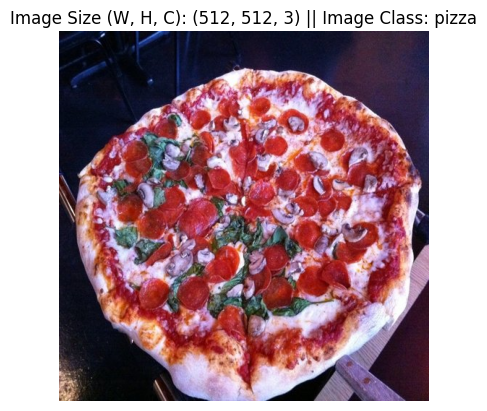

In [ ]:
img = view_random_img('pizza_steak/train/pizza/')

In [ ]:
# Numerical representation of the image we just visualized that will act an the input to a CNN
# Here, each value is the value of red, green and blue for each pixel in the 512x512 image
import numpy as np

img_input_tensor = tf.constant(np.array(img))
img_input_tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  7,   7,  15],
        [  6,   6,  14],
        [  6,   6,  14],
        ...,
        [ 34,  31,  58],
        [ 36,  33,  60],
        [ 38,  35,  62]],

       [[  8,   8,  16],
        [  8,   8,  16],
        [  9,   9,  17],
        ...,
        [ 34,  31,  58],
        [ 32,  29,  56],
        [ 31,  28,  55]],

       [[  9,   8,  14],
        [ 10,   9,  15],
        [ 11,  10,  18],
        ...,
        [ 34,  31,  58],
        [ 31,  28,  55],
        [ 28,  25,  52]],

       ...,

       [[110,  72,  49],
        [ 96,  58,  35],
        [104,  67,  41],
        ...,
        [ 54,  20,  34],
        [ 56,  22,  38],
        [ 53,  19,  35]],

       [[143, 105,  84],
        [100,  62,  39],
        [117,  80,  54],
        ...,
        [ 50,  18,  31],
        [ 51,  19,  34],
        [ 48,  15,  32]],

       [[158, 120,  99],
        [121,  83,  60],
        [159, 121,  98],
        ...,
        [ 47,  15,  2

#Building The First CNN

Now we are going to build our first CNN that will attempt to correctly classify the images we downloaded into pizza images and steak images.

The steps for building a CNN are similar to the steps we are already familiar with, but since we're working with visual data (images in our case) we first need to **load** said images from the directories they reside in, and **preprocess** them into a format that can be fed into a CNN.

Preprocessing in general means:

1.   **Scaling the data** - make the pixel values range from 0 to 1, since, as we already know, it helps the model to train better and converge faster.
2.   **Turning images into batches** - feeding the network all the images at once can cause a huge strain on the network, which may result in the memory to run out before the network is fully trained. Batchifying the images means we're turning the entire images dataset into image batches, and are feeding the network one batch at a time, which helps not only the network to train fully, but also gives the weights more opportunities to update their values to better represent the data.
3.  **Data Augmentation** - is the process of artificially generating new data from existing data, by applying various filters and making small adjustments to existing images (for example mirroring, skeweing, cropping, etc.). This helps the model with finding more patterns in data, and reduces overfitting.

Regarding the architecture, we will replicate the TinyVGG CNN shown in the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

*Note*: We do not need to split the data into features (the images) and labels (name of the classes the images belong to), TensorFlow will automatically handle this during preprocessing.


In [ ]:
# Building the network
# More information on parameters will be given in the next cell
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

tf.random.set_seed(42)

# Defining the train and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Preprocessing and batchifying the data
train_data = image_dataset_from_directory(directory = train_dir,
                                          batch_size = 32,        # Each batch contains 32 images
                                          image_size = (224,224), # Making all the images have a uniform shape of 224x224 (a typically used shape)
                                          shuffle = True,         # Shuffle the data to remove any ordering in the images
                                          label_mode = 'binary',  # binary label mode means that the labels are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
                                          seed = 42)

valid_data = image_dataset_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          shuffle = False,
                                          label_mode = 'binary',
                                          seed = 42)

# Getting the class names
class_names = train_data.class_names

# Recreating the TinyVGG model architecture
model_1 = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255), # This layer does not exist in TinyVGG, but we added it to normalize the pixel values
    tf.keras.layers.Conv2D(filters = 10, # How many neurons in the convolutional layer
                           activation = 'relu',
                           kernel_size = 3, # Size of the filter/kernel (3x3)
                           input_shape = (224,224,3)), # Input shape of the model
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,  # Size of pooling filter (2x2)
                              strides = None,  # Stride means how many pixels will the pooling filter slide over, none means that the filter will slide to the adjacent pixels
                              padding = 'valid'), # Include padding in the images
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compiling the model
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data), # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
                                                           # Here we will have 47 steps per epoch, since we have 1500 train data images split into batches of size 32 (1500/32 = 47)
                        validation_data = valid_data,
                        validation_steps = len(valid_data)) # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 146ms/step - loss: 0.6626 - accuracy: 0.5793 - val_loss: 0.5328 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 5s 103ms/step - loss: 0.5413 - accuracy: 0.7373 - val_loss: 0.5191 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 4s 73ms/step - loss: 0.5097 - accuracy: 0.7607 - val_loss: 0.4970 - val_accuracy: 0.7680
Epoch 4/5
47/47 [==============================] - 4s 74ms/step - loss: 0.4625 - accuracy: 0.7887 - val_loss: 0.4080 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 5s 87ms/step - loss: 0.4302 - accuracy: 0.8073 - val_loss: 0.3441 - val_accuracy: 0.8600


*Note*: If we set `shuffle = True` on validation or test sets, the results will be chaotic in case we want to get predictions and plot classifiaction reports or confusion matrices.

Even though The predictions will be correct (depending on model's accuracy), metrics such as accuracy, recall, etc... will not be reflective of the model's true metrics, due to the fact that we will be comparing predictions and true labels at wrong indices.

**Always `shuffle = True` on the training set and `shuffle = False` on the validation set and test set.**

In [ ]:
# A good performing model with only ~31k parameters
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                        

Great! We just trained our first CNN with a validation accuracy of **86%**.

Now, let's go over the hyperparameters in the convolutional and pooling layers of the CNN we've just built.

**Conv2D**:
*   `filters` = the number of neurons in the convolutional layer. It decides how many filters will convolve over an input image, the more filters there are, the more patterns will the model learn from the data.
*   `kernel_size` = the size of the filter/kernel that will convolve/slide over the image. The kernels are square-shaped (in 2D space) meaning that if `kernel_size = 3` then we're using a 3x3 kernel. These kernels find patterns in the input data and create a feature map (activation map) by caculating the dot product between the weights of the kernel and the weights of the image. This feature map will contain all the most important information found by the convolutional layer. Smaller filters learn smaller features, while bigger filters learn larger features.
*   `strides` = the number of pixels that the kernel should be shifted over at a time. `strides = 1` means the kernel will slide one pixel at a time.
* `padding` = whether padding (additional pixels with a value of 0 on the borders) should be added to the images. This helps the kernels capture more data at the edges of the images, which may lead to better performance. This can also help in preserving the size of the images as they pass through the CNN.

**MaxPool2D**:
*   `pool_size` = the size of the pooling kernel that will slide over the feature map/image. Pooling kernels are also square-shaped. If `pool_size = 2` it means we're using a 2x2 pooling kernel. In this case, the pooling kernel will choose the highest values from each 2x2 square in the feature map and pass it to the next layer.
*   `strides` and `padding` are the same as in the Conv2D layer.

More in-depth information can be found in the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website, that explains all the different parts of a CNN visually.

#Classifying the Dataset with a Non-CNN CV Model

Can we resolve this classification problem without using a CNN?

To answer this, we will build a new model that consists of only dense layers with ReLU activation functions, and fit it to the data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

tf.random.set_seed(42)

# Defining image preprocessing seperately
img_rescale = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255)
])

model_2 = tf.keras.Sequential([
    img_rescale,  # Using the rescaler to normalise images' pixel values
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 67ms/step - loss: 2.7135 - accuracy: 0.5907 - val_loss: 0.6450 - val_accuracy: 0.6660
Epoch 2/5
47/47 [==============================] - 5s 99ms/step - loss: 0.7566 - accuracy: 0.6973 - val_loss: 0.7167 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 3s 65ms/step - loss: 0.7742 - accuracy: 0.7027 - val_loss: 0.4488 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 4s 76ms/step - loss: 0.5063 - accuracy: 0.7707 - val_loss: 0.4784 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 5s 93ms/step - loss: 0.5596 - accuracy: 0.7487 - val_loss: 0.4850 - val_accuracy: 0.7420


In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                

As we can see, we did manage to train a model with only dense and ReLU layers and attained an impressive enough validation accuracy of 74.2%. So, can we drop the CNNs and just use dense layers for applications such as the one we're working with?

The answer is **no**. By looking at the summaries we can see that the CNN only contains ~31k trainable parameters, and is only around 131 kbytes of data, while the second model contains +15 million trainable parameters and is 57.5 megabytes of data. Despite the fact that the second model is way bigger it still is outperformed by the more efficient and powerful CNN.

A CNN seeks to sort out and learn the most important patterns in an image. So even though there are less learnable parameters in our CNN, these are often more helpful in finding the different features in an image.

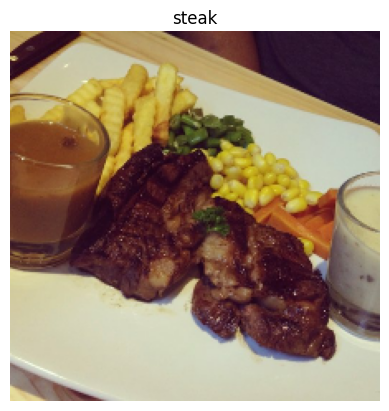

In [ ]:
# Plotting a single image from the train_data batches
import matplotlib.pyplot as plt

image, label = next(iter(train_data)) # Get a single batch from the train_data
plt.imshow(image[0].numpy().astype("uint8")) # plot the first image from the batch
plt.title(class_names[label[0].numpy().astype('uint8')[0]]) # show the label of the first image as a title
plt.axis(False);

In [ ]:
# Pixel values of the previous image as it gets passed through the rescaler in our model
new_img = img_rescale(image[0].numpy().astype("uint8"))
new_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.69803923, 0.5686275 , 0.29803923],
        [0.70980394, 0.5921569 , 0.31764707],
        [0.7294118 , 0.6117647 , 0.3372549 ],
        ...,
        [0.14901961, 0.05882353, 0.16078432],
        [0.15686275, 0.06666667, 0.16862746],
        [0.16078432, 0.07058824, 0.17254902]],

       [[0.7176471 , 0.6       , 0.3254902 ],
        [0.6901961 , 0.57254905, 0.29803923],
        [0.6901961 , 0.57254905, 0.29803923],
        ...,
        [0.15294118, 0.0627451 , 0.16470589],
        [0.14509805, 0.05490196, 0.15686275],
        [0.14117648, 0.0509804 , 0.15294118]],

       [[0.73333335, 0.6156863 , 0.34117648],
        [0.7372549 , 0.61960787, 0.34509805],
        [0.7254902 , 0.60784316, 0.3372549 ],
        ...,
        [0.13333334, 0.04313726, 0.14509805],
        [0.13333334, 0.04313726, 0.14509805],
        [0.14117648, 0.0509804 , 0.15294118]],

       ...,

       [[0.8745099 , 0.8235295 , 0.5764706 ],
        [0.87

#Data Augmentation Basics

As mentioned previously, data augmentation is a part of data preprocessing, it artificially generates new data from existing data, by applying various filters and making small adjustments to existing images to help the model learn more patterns and find more features, as well as to **reduce** **overfitting**.

In TensorFlow, building a data augmentation filter is the same as building a DL model. In the filter we define all the the adjustments we want to make to the image.

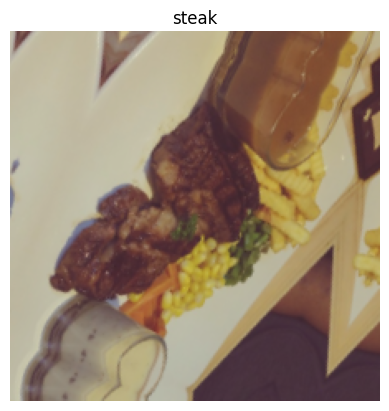

In [ ]:
# Defining the filter
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"), # Randomly flips the images vertically or horizontally
  tf.keras.layers.RandomZoom(0.8, 0.2), # Randomly zooms in to parts of an image
  tf.keras.layers.RandomContrast(0.5), # Randomly adjusts contrast during training
  tf.keras.layers.RandomRotation(0.2), # Randomly rotates the images
])

# Applying the filter to the previous image
augmented_img = data_augmentation(new_img)
plt.imshow(augmented_img)
plt.title(class_names[label[0].numpy().astype('uint8').item()])
plt.axis(False);

#Evaluating The CNN Model

##Plotting Loss & Accuracy Curves

In [ ]:
# For evaluation, we'll first plot the train and validation loss and accuracy curves
# For this we'll define a function that takes in the history of a model
def plot_curves(history):
  '''
  Takes in the history of a traiend TensorFlow model, and plots its loss and metrics curves
  '''
  # Getting accuracy and loss values from the history
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_acc = history.history['accuracy']
  valid_acc = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.figure()
  plt.plot(epochs, train_loss, label = 'Train Loss')
  plt.plot(epochs, valid_loss, label = 'Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss Curves')
  plt.legend()
  # Plot accuracy
  plt.figure()
  plt.plot(epochs, train_acc, label = 'Train Acc.')
  plt.plot(epochs, valid_acc, label = 'Validation Acc.')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Accuracy Curves')
  plt.legend();

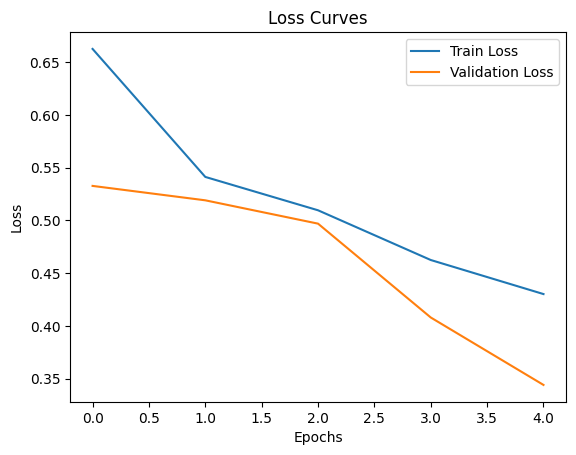

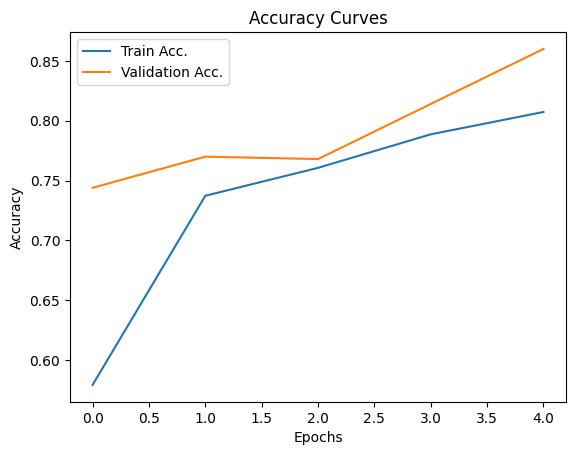

In [ ]:
plot_curves(history_1)

We got great looking metrics curves; train and validation losses are steadily decreasing, while the train and validation accuracies are steadily increasing.

##Getting the Classification Report & Confusion Matrix

In [ ]:
# Making predicitons with model_1 on the validation data
y_preds = model_1.predict(valid_data)

16/16 [==============================] - 1s 54ms/step


In [ ]:
# Rounding the prediction probabilities to get the prediction labels
y_preds = tf.round(y_preds).numpy()
y_preds[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
# Getting the true labels from the validation data
y_true = np.concatenate([y for x, y in valid_data])
y_true[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
# Defining a function to print the classification report and the confusion matrix of a model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def classification_metrics(y_pred, y_true, class_names):
  '''
  Prints the classification report and the confusion matrix of a model
  Args:
    y_pred: a list of predicted labels.
    y_true: a list of true labels of the dataset that was predicted on.
    class_names: a list of of the class names in the dataset.
  '''
  print(classification_report(y_true, y_pred, target_names = class_names))
  cm = confusion_matrix(y_true, y_pred)
  ConfusionMatrixDisplay(cm, display_labels = class_names).plot()

              precision    recall  f1-score   support

       pizza       0.86      0.89      0.87       250
       steak       0.89      0.85      0.87       250

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



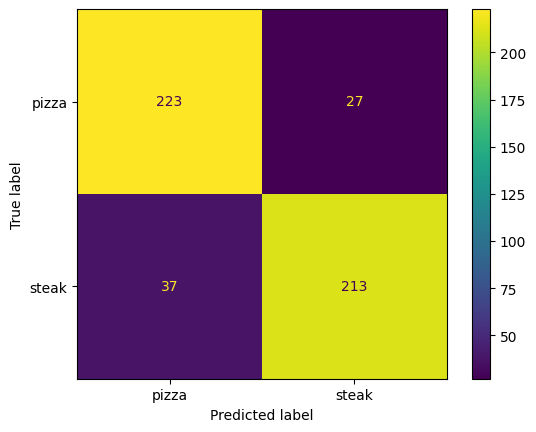

In [ ]:
classification_metrics(y_pred = y_preds,
                       y_true = y_true,
                       class_names = class_names)

#Fitting the Model with Data Augmentation

Let's try to fit the well performing model to the data after applying some data augmentation first.

We are going to use filters such as zooming, flipping, contrast adjustment, etc.

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation, RandomFlip, RandomZoom, RandomContrast, RandomRotation, Rescaling
from tensorflow.keras.optimizers import Adam

In [ ]:
# Building the filter
image_preprocess = Sequential([
    Rescaling(1./255),
    RandomZoom(0.8, 0.2),
    RandomFlip('horizontal_and_vertical'),
    RandomContrast(0.5),
    RandomRotation(0.2)
])

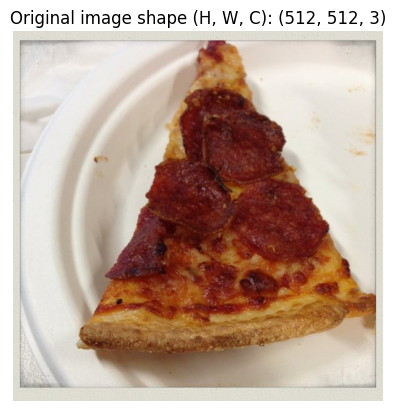

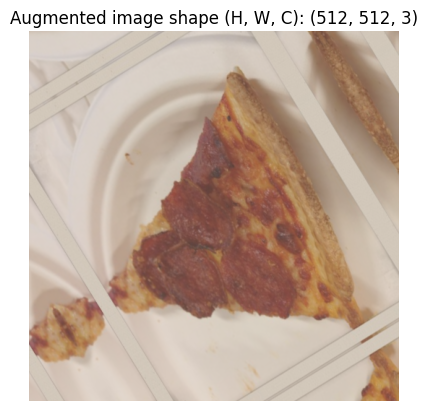

In [ ]:
# Visualizing a preprocessed image
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Getting a random pizza image
folder_path = 'pizza_steak/train/pizza/'
random_img = random.sample(os.listdir(folder_path), 1)[0]
image_path = folder_path + random_img

# Opening it with PIL
img = Image.open(image_path)

# Applying the filters to the image
prep_img = image_preprocess(img)

# Plotting the image
plt.figure()
plt.imshow(img)
plt.title(f'Original image shape (H, W, C): {prep_img.shape}')
plt.axis(False)
plt.figure()
plt.imshow(prep_img)
plt.title(f'Augmented image shape (H, W, C): {prep_img.shape}')
plt.axis(False);

In [ ]:
# Creating image datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

train_data = image_dataset_from_directory(directory = train_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          labels = 'inferred',
                                          label_mode = 'binary',
                                          shuffle = True,
                                          seed = 42)

valid_data = image_dataset_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          shuffle = False,
                                          labels = 'inferred',
                                          label_mode = 'binary',
                                          seed = 42)

class_names = train_data.class_names

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Building the model that will implement the data augmentation filter defined above
tf.random.set_seed(42)

model_aug = Sequential([
    image_preprocess,
    Conv2D(filters = 10,
           activation = 'relu',
           kernel_size = 3,
           input_shape = (224,224,3)),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2,
              strides = None,
              padding = 'valid'),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_aug.compile(loss = tf.keras.losses.binary_crossentropy,
                  optimizer = Adam(),
                  metrics = ['accuracy'])

history_aug = model_aug.fit(train_data,
                            epochs = 5,
                            steps_per_epoch = len(train_data),
                            validation_data = valid_data,
                            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 117ms/step - loss: 0.6342 - accuracy: 0.6227 - val_loss: 0.5080 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 5s 91ms/step - loss: 0.5159 - accuracy: 0.7433 - val_loss: 0.3867 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 4s 74ms/step - loss: 0.4874 - accuracy: 0.7713 - val_loss: 0.3888 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.4668 - accuracy: 0.7807 - val_loss: 0.3327 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 4s 76ms/step - loss: 0.4416 - accuracy: 0.7947 - val_loss: 0.3201 - val_accuracy: 0.8620


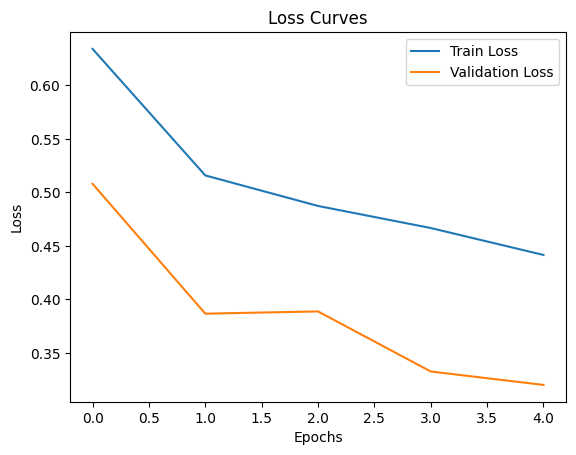

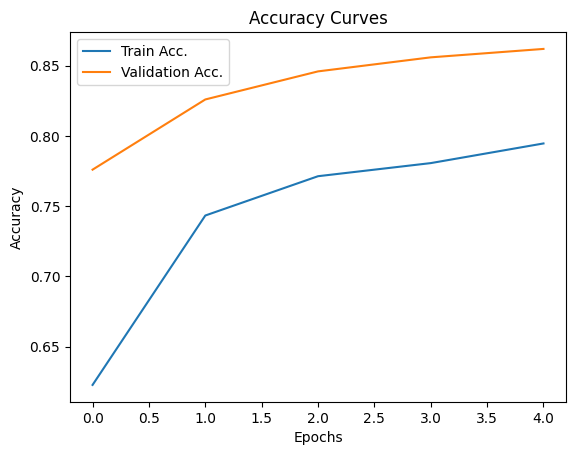

In [ ]:
# Plotting loss and accuracy curves
plot_curves(history_aug)

Using data augmentation we got great loss and accuracy curves.

We also got a slightly lower validation loss, and a slightly higher validation accuracy, which means that the model benefited from the data augmentation.

Important to note that data augmentation will not always yield better results, but it is still a good idea to at least fit a model once with data augmentation, especially when faced with overfitting.

#Making a Prediction on a Custom Image

Now that we trained a good performing model, we want to use it to predict the class of a custom, never before seen, image.

To acomplish this, we will use our `model_aug` model, to try and correctly classify an image of a steak we downloaded from the internet.

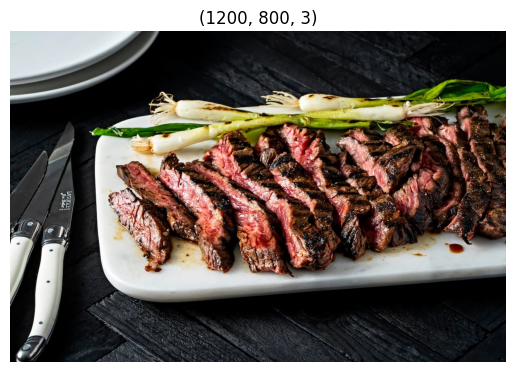

In [ ]:
# Visualizing the custom image
from PIL import Image
import matplotlib.pyplot as plt

custom_img = Image.open('steak.jpg')

plt.imshow(custom_img)
plt.title(custom_img.size + (len(img.mode),))
plt.axis(False);

But can we pass a custom image as is to our TensorFlow model? Usually no, and any custom image needs to be preprocessed in order for our model to be able to work with it.

For example, our model was trained on normalized images of size 224x224, which naturally means we need to normalize and resize our custom images. Also, since it was trained on images in batches, each image has an extra dimension that represents the batch size, hence we need to use `expand_dims` on our custom image, to add that extra batch dimension.

In [ ]:
# Creating a function that will read an image and preprocess it to be compatible with our model
def load_and_prep(image_path, image_size = 224):
  '''
  Reads in an image, transforms it into a tensor, resizes and normalizes it, and
  adds the extra batch_size dimension to it.
  '''
  # Read in the image (This operation returns a tensor with the entire contents of the input filename)
  img = tf.io.read_file(image_path)
  # Decode the image into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size = [image_size, image_size])
  # Adding the batch_size dimension
  img = tf.expand_dims(img, axis = 0)
  # Rescale the image
  img = img/255.

  return img

In [ ]:
custom_img = load_and_prep('/content/steak.jpg')
custom_img

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.8       , 0.85490197, 0.85882354],
         [0.7972989 , 0.85220087, 0.86032414],
         [0.79495794, 0.8498599 , 0.8616246 ],
         ...,
         [0.00784314, 0.01176471, 0.01960784],
         [0.00784314, 0.01176471, 0.01960784],
         [0.00672269, 0.01064426, 0.0184874 ]],

        [[0.8       , 0.85490197, 0.85882354],
         [0.80210084, 0.85700285, 0.8651261 ],
         [0.8039216 , 0.85882354, 0.87058824],
         ...,
         [0.00784314, 0.01176471, 0.01960784],
         [0.00784314, 0.01176471, 0.01960784],
         [0.00392157, 0.00784314, 0.01568628]],

        [[0.8016807 , 0.85658264, 0.8605042 ],
         [0.8019408 , 0.85684276, 0.864966  ],
         [0.8016807 , 0.85658264, 0.86834735],
         ...,
         [0.00784314, 0.01176471, 0.01960784],
         [0.00706271, 0.01098428, 0.01882741],
         [0.00392157, 0.00784314, 0.01568628]],

        ...,

        [[0.        , 0.00392157, 

In [ ]:
# Using the model to predict on the preprocessed image
pred_prob = model_aug.predict(custom_img).item()
pred_prob

1/1 [==============================] - 0s 85ms/step


0.9897975921630859

In [ ]:
# Getting the prediction label
pred_label = tf.round(pred_prob)
pred_label.numpy()

1.0

In [ ]:
# Indexing on the class names
class_names[pred_label.numpy().astype('int8')]

'steak'

It seems that our model correctly classified the image as an image of steak!

In [ ]:
# A function to predict on and plot the custom image
def pred_plot(model, image, class_names = class_names):
  '''
  Predicts the class of the input image using the model.
  Plots the image with its predicted class as the title.
  '''
  # Using load_and_prep fucntion we previously created to load and preprocess the image
  img = load_and_prep(image)
  # Predicting the class of the image using the model
  pred_prob = model.predict(img).item()
  # Getting the classification label
  pred_label = tf.round(pred_prob)
  # Indexing on the class_names to get the string name of the predicted class
  pred_class = class_names[int(pred_label.numpy())]
  # Plotting the image (we need to remove the single dimensions (batch_dimension) using tf.squeeze(), since matplotlib cannot plot images with more that 3 dimensions)
  plt.imshow(tf.squeeze(img))
  plt.title(f'Predicted class: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 18ms/step


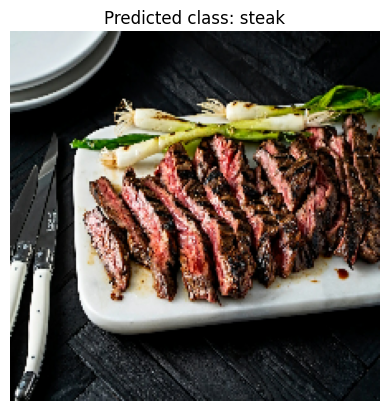

In [ ]:
pred_plot(model_aug, 'steak.jpg', class_names)

#End-to-End Multiclass Classification CV Application

Now that we're comfortable with working with a binary classification CV application, let's step things up a bit and work with a multiclass classifcation problem.

Again, we will be working with a subset of the Food101 dataset, but this time, we will use 10 types of food instead of 2.

##Downloading & Exploring the Data

In [1]:
# Downloading and unzipping the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

with zipfile.ZipFile('10_food_classes_all_data.zip', 'r') as zipref:
  zipref.extractall()

--2024-06-26 10:41:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.4MB/s    in 23s     

2024-06-26 10:41:50 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
# Walking through the directories
import os

for dirpath, dirname, filepath in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirname)} directories and {len(filepath)} files in '{dirpath}'.")

There are 2 directories and 0 files in '10_food_classes_all_data'.
There are 10 directories and 0 files in '10_food_classes_all_data/train'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 files in '10_food_classes_all_data/train/grilled_salmon'.
There are 1

In [5]:
# Setting up the train and test dirs
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

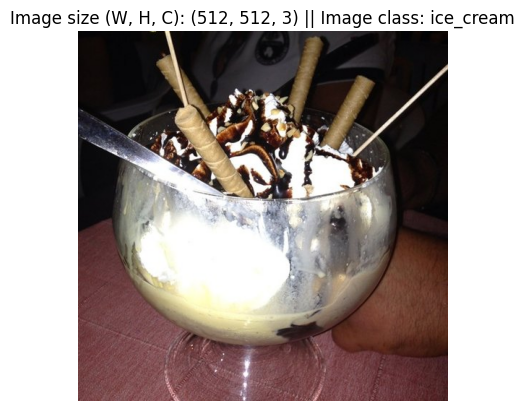

In [9]:
# Visualizing an image
img = view_random_img('10_food_classes_all_data/train/ice_cream/')

##Preparing and Preprocessing the Data

In [16]:
# Turning directories into datasetsو batchifying the images and getting the class names
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(directory = train_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          labels = 'inferred',
                                          label_mode = 'categorical',
                                          shuffle = True,
                                          seed = 42)

valid_data = image_dataset_from_directory(directory = test_dir,
                                          batch_size = 32,
                                          image_size = (224,224),
                                          labels = 'inferred',
                                          label_mode = 'categorical',
                                          shuffle = False,
                                          seed = 42)

class_names = train_data.class_names

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [17]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

##Building the CNN

Just as before, we will replicate the TinyVGG model and fit it to our train data.

For preprocessing, we will simply normalize the images.